In [83]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


# read data
df = pd.read_csv(r'C:\Users\Admin\Downloads\heart_2020_cleaned.csv')

In [84]:
# looking at data

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [85]:
# check if any data is missing

for col in df.columns:
    dataMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, dataMissing))

HeartDisease - 0.0%
BMI - 0.0%
Smoking - 0.0%
AlcoholDrinking - 0.0%
Stroke - 0.0%
PhysicalHealth - 0.0%
MentalHealth - 0.0%
DiffWalking - 0.0%
Sex - 0.0%
AgeCategory - 0.0%
Race - 0.0%
Diabetic - 0.0%
PhysicalActivity - 0.0%
GenHealth - 0.0%
SleepTime - 0.0%
Asthma - 0.0%
KidneyDisease - 0.0%
SkinCancer - 0.0%


In [86]:
# check data types for each columns

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [87]:
# new age category - fix age range
# make a new column

df['NewAge'] = df['AgeCategory'].astype(str).str[:2]

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,55
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,65
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,75
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,40


In [88]:
df = df.sort_values(by=['NewAge'], inplace=False, ascending=False)

In [89]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
NewAge               object
dtype: object

In [90]:
# ASSUMPTIONS: BMI has high correlation, 18.6 - 24.9 = considered healthy
# ASSUMPTIONS: Listed below are more at risk:
# Smoker, Heavy Drinker, History of Stroke, High Rate at Physical & Mental Health, Difficulty walking,
# Diabetic, No physical activity, Low SleepTime, with Asthma, with kidney disease, higher NewAge

In [91]:
# make new column: convert Yes / No into 1 / 0

df['HaveDisease'] = df['HeartDisease'].map(dict(Yes=1, No=0))

In [92]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80,0


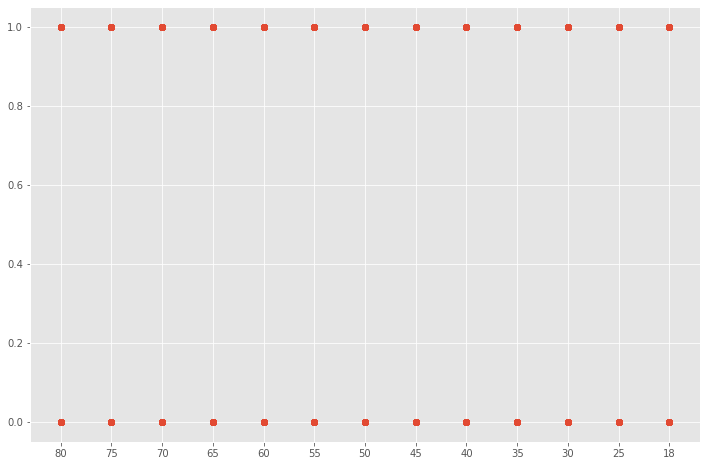

In [93]:
# Scatter Plot with NewAge vs HaveDisease

plt.scatter(x=df['NewAge'], y=df['HaveDisease'])
plt.show()

In [94]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80,0


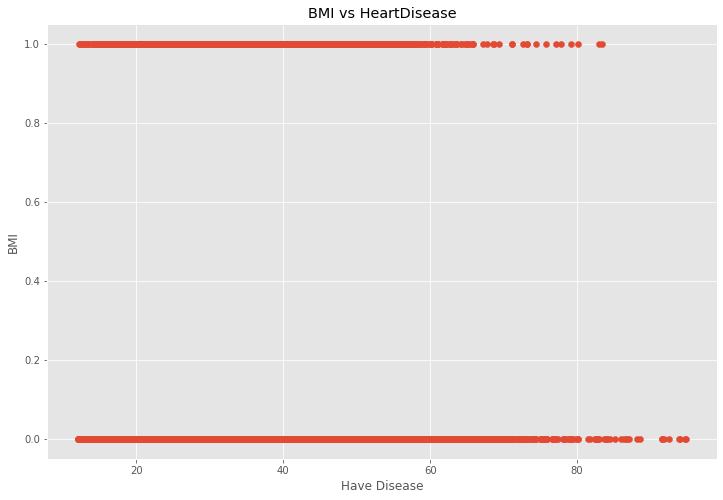

In [95]:
# BMI vs Disease

plt.scatter(x=df['BMI'], y=df['HaveDisease'])
plt.title('BMI vs HeartDisease')
plt.xlabel('Have Disease')
plt.ylabel('BMI')
plt.show()

In [96]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80,0


In [97]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,HaveDisease
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,80,0
245603,Yes,26.04,Yes,Yes,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,7.0,No,No,No,80,1
72923,No,29.15,No,No,No,1.0,0.0,Yes,Male,80 or older,Black,Yes,Yes,Fair,8.0,No,No,No,80,0
72926,No,29.76,No,No,No,0.0,0.0,No,Female,80 or older,Black,No,Yes,Good,6.0,No,No,No,80,0
182773,No,23.92,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,7.0,No,No,No,80,0


In [ ]:
# conditioning on basis of variables
sns.lmplot(x='BMI', y='SleepTime', col='NewAge', data=df)
sns.lmplot(x='BMI', y='SleepTime', col='PhysicalHealth', data=df)

# conditioning on basis of variables
# df1 - diseased
df1, df2 = df.loc[df['HaveDisease']>=1],
df.loc[df['HaveDisease']<1]
plt.show()

In [ ]:
sns.regplot(x='BMI', y='SleepTime', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.show()

In [ ]:
# default: pearson
df.corr()

In [ ]:
df.corr(method='kendall')

In [ ]:
df.dtypes

# convert NewAge(object) into float64

In [ ]:
df['NewAge'] = df['NewAge'].astype(float, errors = 'raise')

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.corr()

In [ ]:
# visualize correlation matrix

correlation = df.corr()

sns.heatmap(correlation, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Disease Factors')
plt.ylabel('Disease Factors')

plt.show()

In [ ]:
# look at DiffWalking (non-numeric)
# make a way to include string in the correlation matrix

df.dtypes

In [ ]:
# give number values to strings in category
df_toNumeric = df

# to convert: (for only Yes / No)
# ASSUMING Yes is bad (except for Physical Activity (not included) )
# Smoking, Alcohol Drinking, Stroke, DiffWalking, Diabetic, Asthma
# Kidney Disease, Skin Cancer

for col_name in df_toNumeric.columns:
    if(df_toNumeric[col_name].dtype == 'object'):
        df_toNumeric[col_name] = df_toNumeric[col_name].astype('category')
        df_toNumeric[col_name] = df_toNumeric[col_name].cat.codes
        
df_toNumeric

# no need to use HaveDisease column, also try to use AgeCategory instead of NewAge,
# but don't modify NewAge, field is sorted through NewAge

In [ ]:
correlation = df_toNumeric.corr()

sns.heatmap(correlation, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Disease Factors')
plt.ylabel('Disease Factors')

plt.show()

# 1 is male
# PROBLEM with GenHealth, Excellent=0, but fair=1, good is 2
# results in AgeCategory & NewAge might be similar,
# also in HeartDisease & HaveDisease

In [ ]:
# Filter Correlation Matrix

df_toNumeric.corr()

In [ ]:
new_matrix = df_toNumeric.corr()

correlation_pairs = new_matrix.unstack()

correlation_pairs

In [ ]:
# Top 3 Highest Correlations: Age, Difficulty Walking, History of Stroke

pd.set_option('display.max_rows', None)

In [ ]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

In [ ]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.05]
high_correlation

# Check highest correlations to HeartDisease/HaveDisease

In [ ]:
# FINAL CONCLUSION
# Deciding Factors of Heart Disease:
# Age, DiffWalking, Stroke, Physical Health, Diabetic, Kidney Disease, and so on
# General Health conversion was not on point, but other factors could account for it